# physics760 - Problem Set 1

### Team:
- Sumin Alff-Kim : 3282322
- Lennart Voorgang: 3124372

### Code
- [Repository](https://github.com/suminalffkim/ComputationalPhysics)
- [Subdirectory for this assignment](https://github.com/suminalffkim/ComputationalPhysics/tree/main/1%20-%20Estimate%20of%20PI)
- CommitID: **54f4dcfb50cba46d6a4a1a3111b4c98cba09efbe**

# Dependencies / Setup

We use a python `venv` environment for the project:
- Create the environment with `python3 -m venv .venv`
- To active the environment run `source .venv/bin/active` (Linux)
- To Install the required dependencies run `pip install -r pip install -r requirements.txt`
- Run `jupyter notebook`

In [1]:
# Standard imports for computation physics
import numpy as np
import matplotlib.pyplot as plt
import typing
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

# 1.0 - PI Estimation

In [2]:
# Estimates PI with a given number of samples and experiments by uniformly sampling points in [-1, 1]
# and determining the ratio of points falling inside the unit circle. Returns a numeric estimate for PI,
# its standard deviation and the list of points for every experiment.
def estimate_pi(num_samples: float, num_experiments: float) -> typing.Tuple[typing.Tuple[float], typing.List[float], typing.List[typing.List[float]]]:
  points = np.random.uniform(low=-1.0, high=1.0, size=(2, num_samples, num_experiments, ))
  radius = (points**2).sum(axis=0)

  pi_means = 4 * (radius <= 1).sum(axis=0) / num_samples
  pi_stds = np.sqrt((np.sum((4 * (radius <= 1) - pi_means)**2, axis=0)) / num_samples)

  return (pi_means, pi_stds, radius.T)

## 1.1 Just do one big experiment
<font color='blue'>**Q: Compute the mean and standard deviation of the π observable inside this single experiment**</font><br>

In [76]:
# Run simulation with 10_000 samples and 1 experiment and plot r and r^2
pi_mean, pi_std, radius = estimate_pi(10000, 1)
print(f'PI Mean={pi_mean[0]:.3f}. Standard Deviation={pi_std[0]:.3f}')

PI Mean=3.152. Standard Deviation=1.635


<font color='blue'>**Q: Plot a histogram of all the radii $r = \sqrt{x_p^2 + y_p^2}$ and $r^2 = x_p^2 + y_p^2$**</font><br>

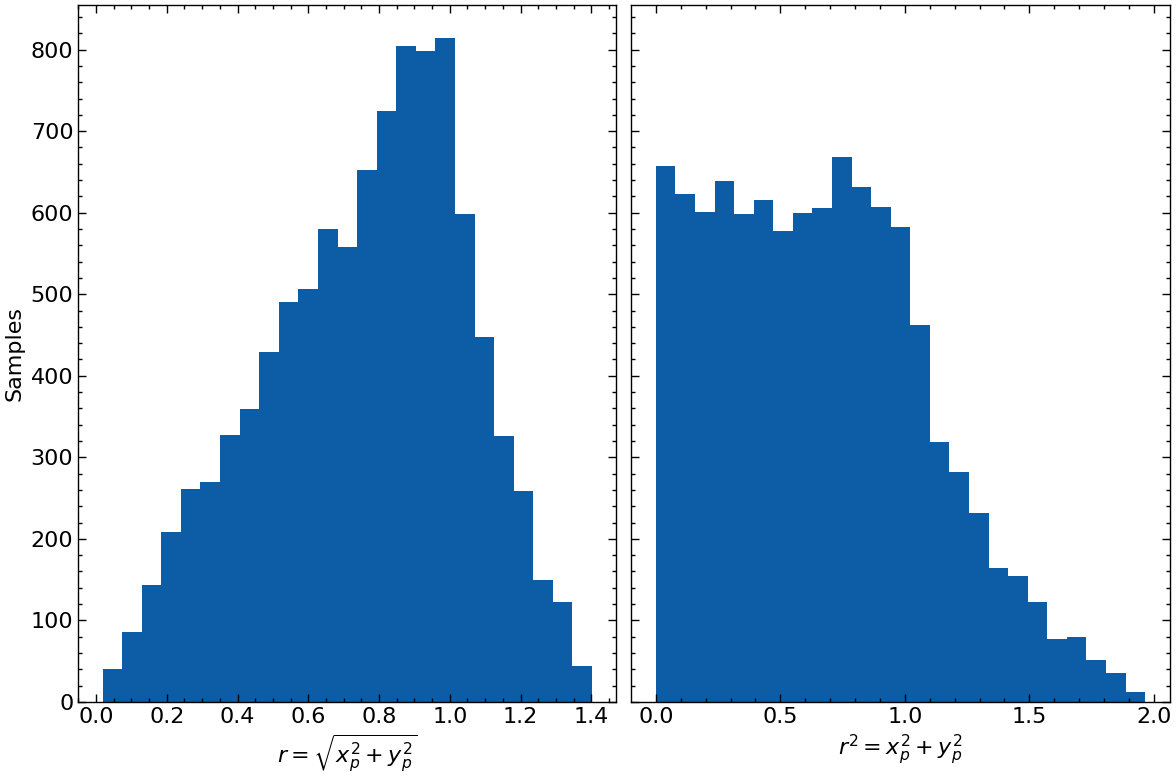

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.hist(np.sqrt(radius[0]), bins=25)
ax1.set_ylabel('Samples')
ax1.set_xlabel('$r = \\sqrt{x_p^2 + y_p^2}$')

ax2.hist(radius[0], bins=25)
ax2.set_xlabel('$r^2 = x_p^2 + y_p^2$')

fig.tight_layout()

<font color='blue'>**Q: Write a few sentences (which may include mathematics) explaining why the histograms have the features they do to the left of 1 and to the right of 1. In particular explain why the behavior differs so dramatically for values less than 1.**</font>

The histgram above shows that the $r^2=x_p^2+y_p^2$.  Since $x,y\in [-1,1]$ can the radius $r$ be $r\in[0,2]$.<br> If $(x,y)=(0,0)$ will $r^2=0^2+0^2=0$ and for $(x,y)=(1,1)$ will $r^2=1^2+1^2=2$. Therefore there are the features left of 1 and right of 1.

<font color='blue'>**Q: Plot a histogram of the indicator variable $4[x^2 + y^2 \leq 1]$. Draw a vertical line at the mean of all the
samples, and indicate the mean $\pm$ standard deviation with vertical lines. Indicate the true, known
value of $\pi$ for comparison.**</font>

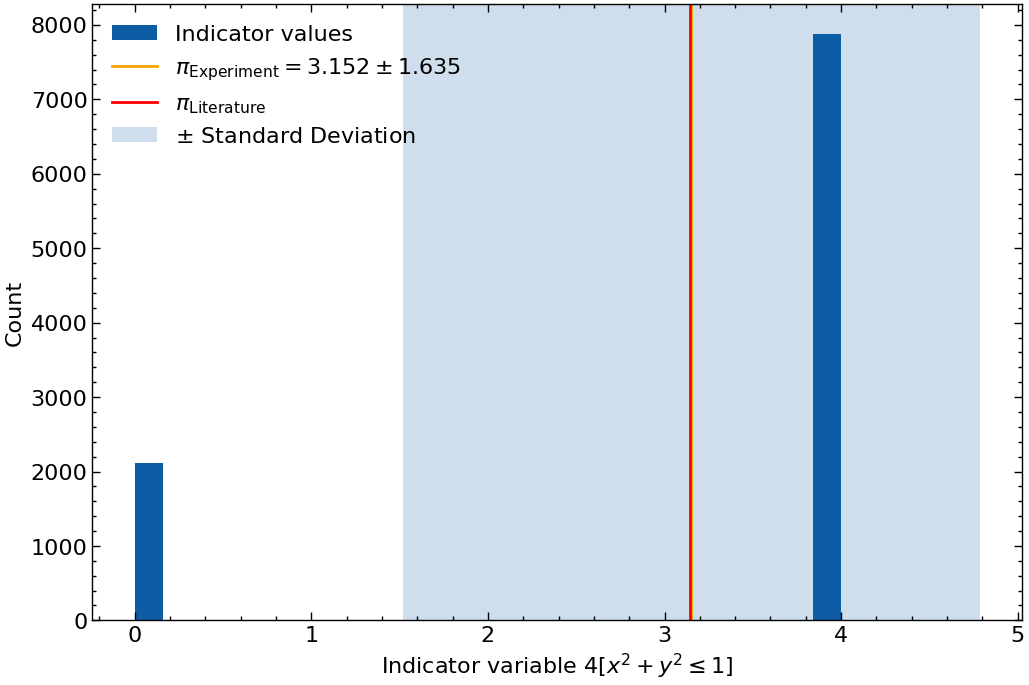

In [78]:
# Calculate inidicator variable, means and std
inside_circle = 4 * (radius[0] <= 1)
mean = inside_circle.mean()
std = inside_circle.std()

# Plot indicator variable as histogram
plt.hist(inside_circle, bins=25, label='Indicator values')
plt.axvline(x=mean, color='orange', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2, label='$\\pm$ Standard Deviation')

plt.xlabel('Indicator variable $4[x^2 + y^2 \\leq 1]$')
plt.ylabel('Count')
plt.legend()

plt.show()

## 1.2 Split into 100 experiments

<font color='blue'>**Q: Compute the estimate $\pi_x$ for each experiment $x$. Compute the mean and its uncertainty using estimates, as in (2)**</font>

In [102]:
# Estiamte PI with 100 experiments with 100 samples each
pi_means, pi_stds, radius = estimate_pi(100, 100)

mean = pi_means.sum() / 100
uncertainty = np.sqrt(((pi_means - mean)**2).sum() / (100-1))
print(f'Estimation for PI=({mean:.3f} +- {uncertainty:.3f})')

Estimation for PI=(3.162 +- 0.158)


<font color='blue'>**Q: Plot a histogram of the estimates (there should be $X = 100$ numbers that go into your histogram, each
one an average of $P = 100$ numbers). Indicate the true known value of π, and indicate the mean, and
the mean $\pm$ the uncertainty**</font>

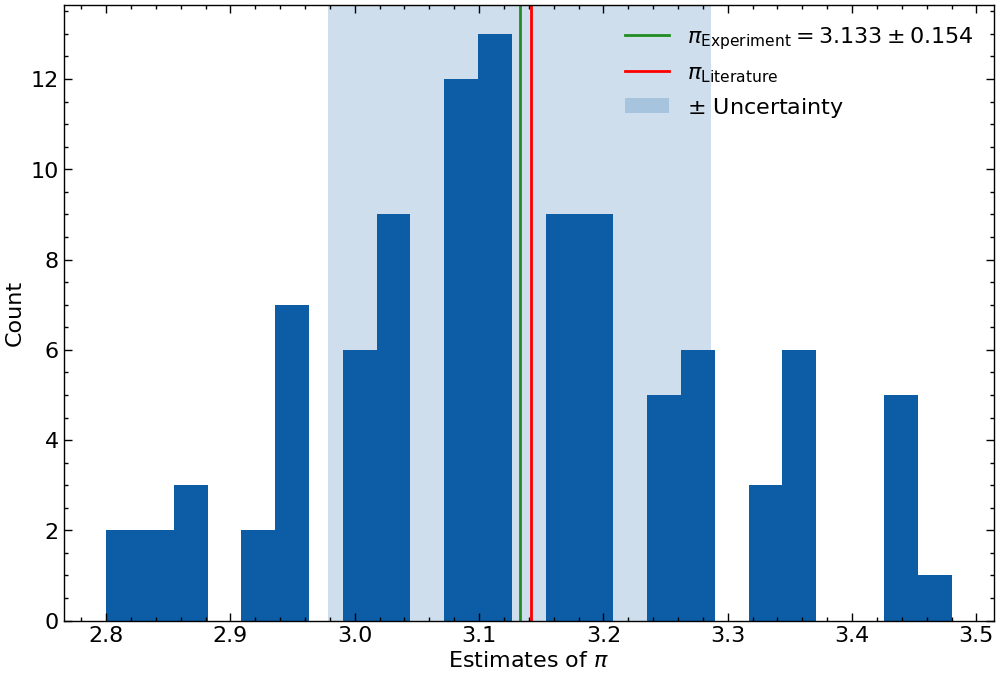

In [63]:
plt.hist(pi_means, bins=25)
plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {uncertainty:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - uncertainty, xmax=mean + uncertainty, alpha=0.2, label='$\\pm$ Uncertainty')

plt.xlabel('Estimates of $\\pi$')
plt.ylabel('Count')
plt.legend()
plt.show()

## 1.3 A Zillion Little Experiments

In [92]:
#estimate pi for P=1, X=10000 and draw histogram
pi_means, pi_stds, radius = estimate_pi(1, 10000)

mean = pi_means.sum() / 10000
uncertainty = np.sqrt(np.sum((pi_means - mean)**2) / (10000 - 1))
print(f'Estimation for PI=({mean:.3f} +- {uncertainty:.3f})')

Estimation for PI=(3.138 +- 1.645)


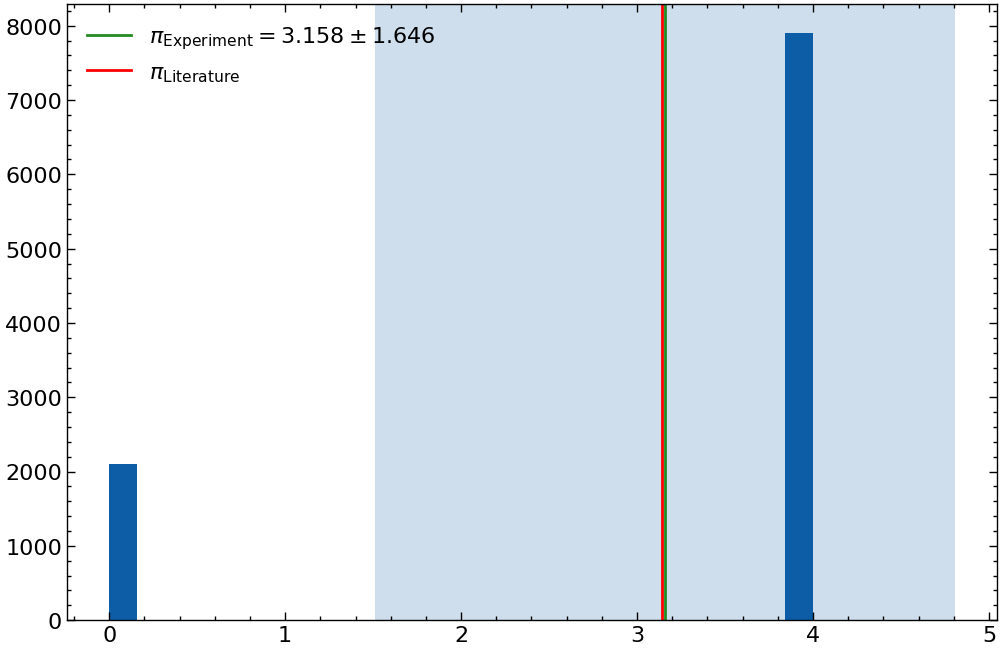

In [75]:
# Plot histogram
plt.hist(pi_means, bins=25)
plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.legend()
plt.show()

<font color='blue'>**Q.What do we get if we try P = 1 and X = 10000? In other words, every patient is their own clinical trial. Are the results familiar? Explain**</font>

When we use only $1$ sample per experiment we get the same result as in exercise 1.1. This seems plausible as our formular for estimating $\pi$ reduces to just the indicator variable in the case $P=1$:
$$
    \pi_x = \frac{1}{P}\sum_p{4 [x_p^2 + y_p^2 \leq 1]} \stackrel{P=1}{=} 4 [x_p^2 + y_p^2 \leq 1]
$$
The indicator variable can only take the two distinct values $0$ and $4$ so our histogram looks exactly like in 1.1.

## 1.4 Stop and think


<font color='blue'>**Q: Hopefully you found a standard deviation of about 1.6 for the first case (part 1.1) and an uncertainty of about
0.16 for the second case (part 1.2), even though you used the same number of random pairs, XP = 10000
in each case. (Of course, the exact values may differ a bit, because it’s a randomized computation!)**</font><br>

**Were the estimates of the previous parts compatible with the known value of π?**<br>
The mean values, which are our estimations for $\pi$, vary from approximately from $3.1$ to $3.2$ which is close enough the to real $\pi$. When running the calculations multiple times, one may notice that for higher $X$ the mean value and uncertainty become more stable.
<br>

**Write a few sentences explaining whether the standard deviation of a single experiment (as in 1.1) makes sense as an uncertainty.**<br>
The standard deviation from 1.1 represents more the uncertainty of the random radii than the uncertainty of $\pi$ which we are interested in. For $X=1$ it does not matter but for more experiments it makes more sense the calculate the uncertainty based on the individual PIs.

Another problem is that our std/uncertainty only falls like $N^{-1/2}$. Compared to the trapazoid rule or simpsons rule this is very slow. As a result when we multiply the number of samples with $100$ the std/uncertainty reduces by a factor of $10$. This is why the factor above the fraction matters a lot. For the raw standard deviation the expression $(x_i - \mu)^2$ varies a lot more than the expression $(\pi_x - \text{final answer})^2$ used in the uncertainty (2). This is because $\pi_x$ is already a mean values over the number of samples.
<br>

**Write a few sentences explaining why just reorganizing the way we ‘spent’ our random numbers matters.** <br>
Optimally we want to spent the random number in such a way that we get very both a very stable estimate and a small uncertainty. As we have already seen above more experiments generally result in a more stable value and more samples result in a smaller uncertainty. Therefore, we should never spent all our random number in just $X$ or just $P$ but rather split them up.

## 1.5 More Experiments vs. Longer Experiments


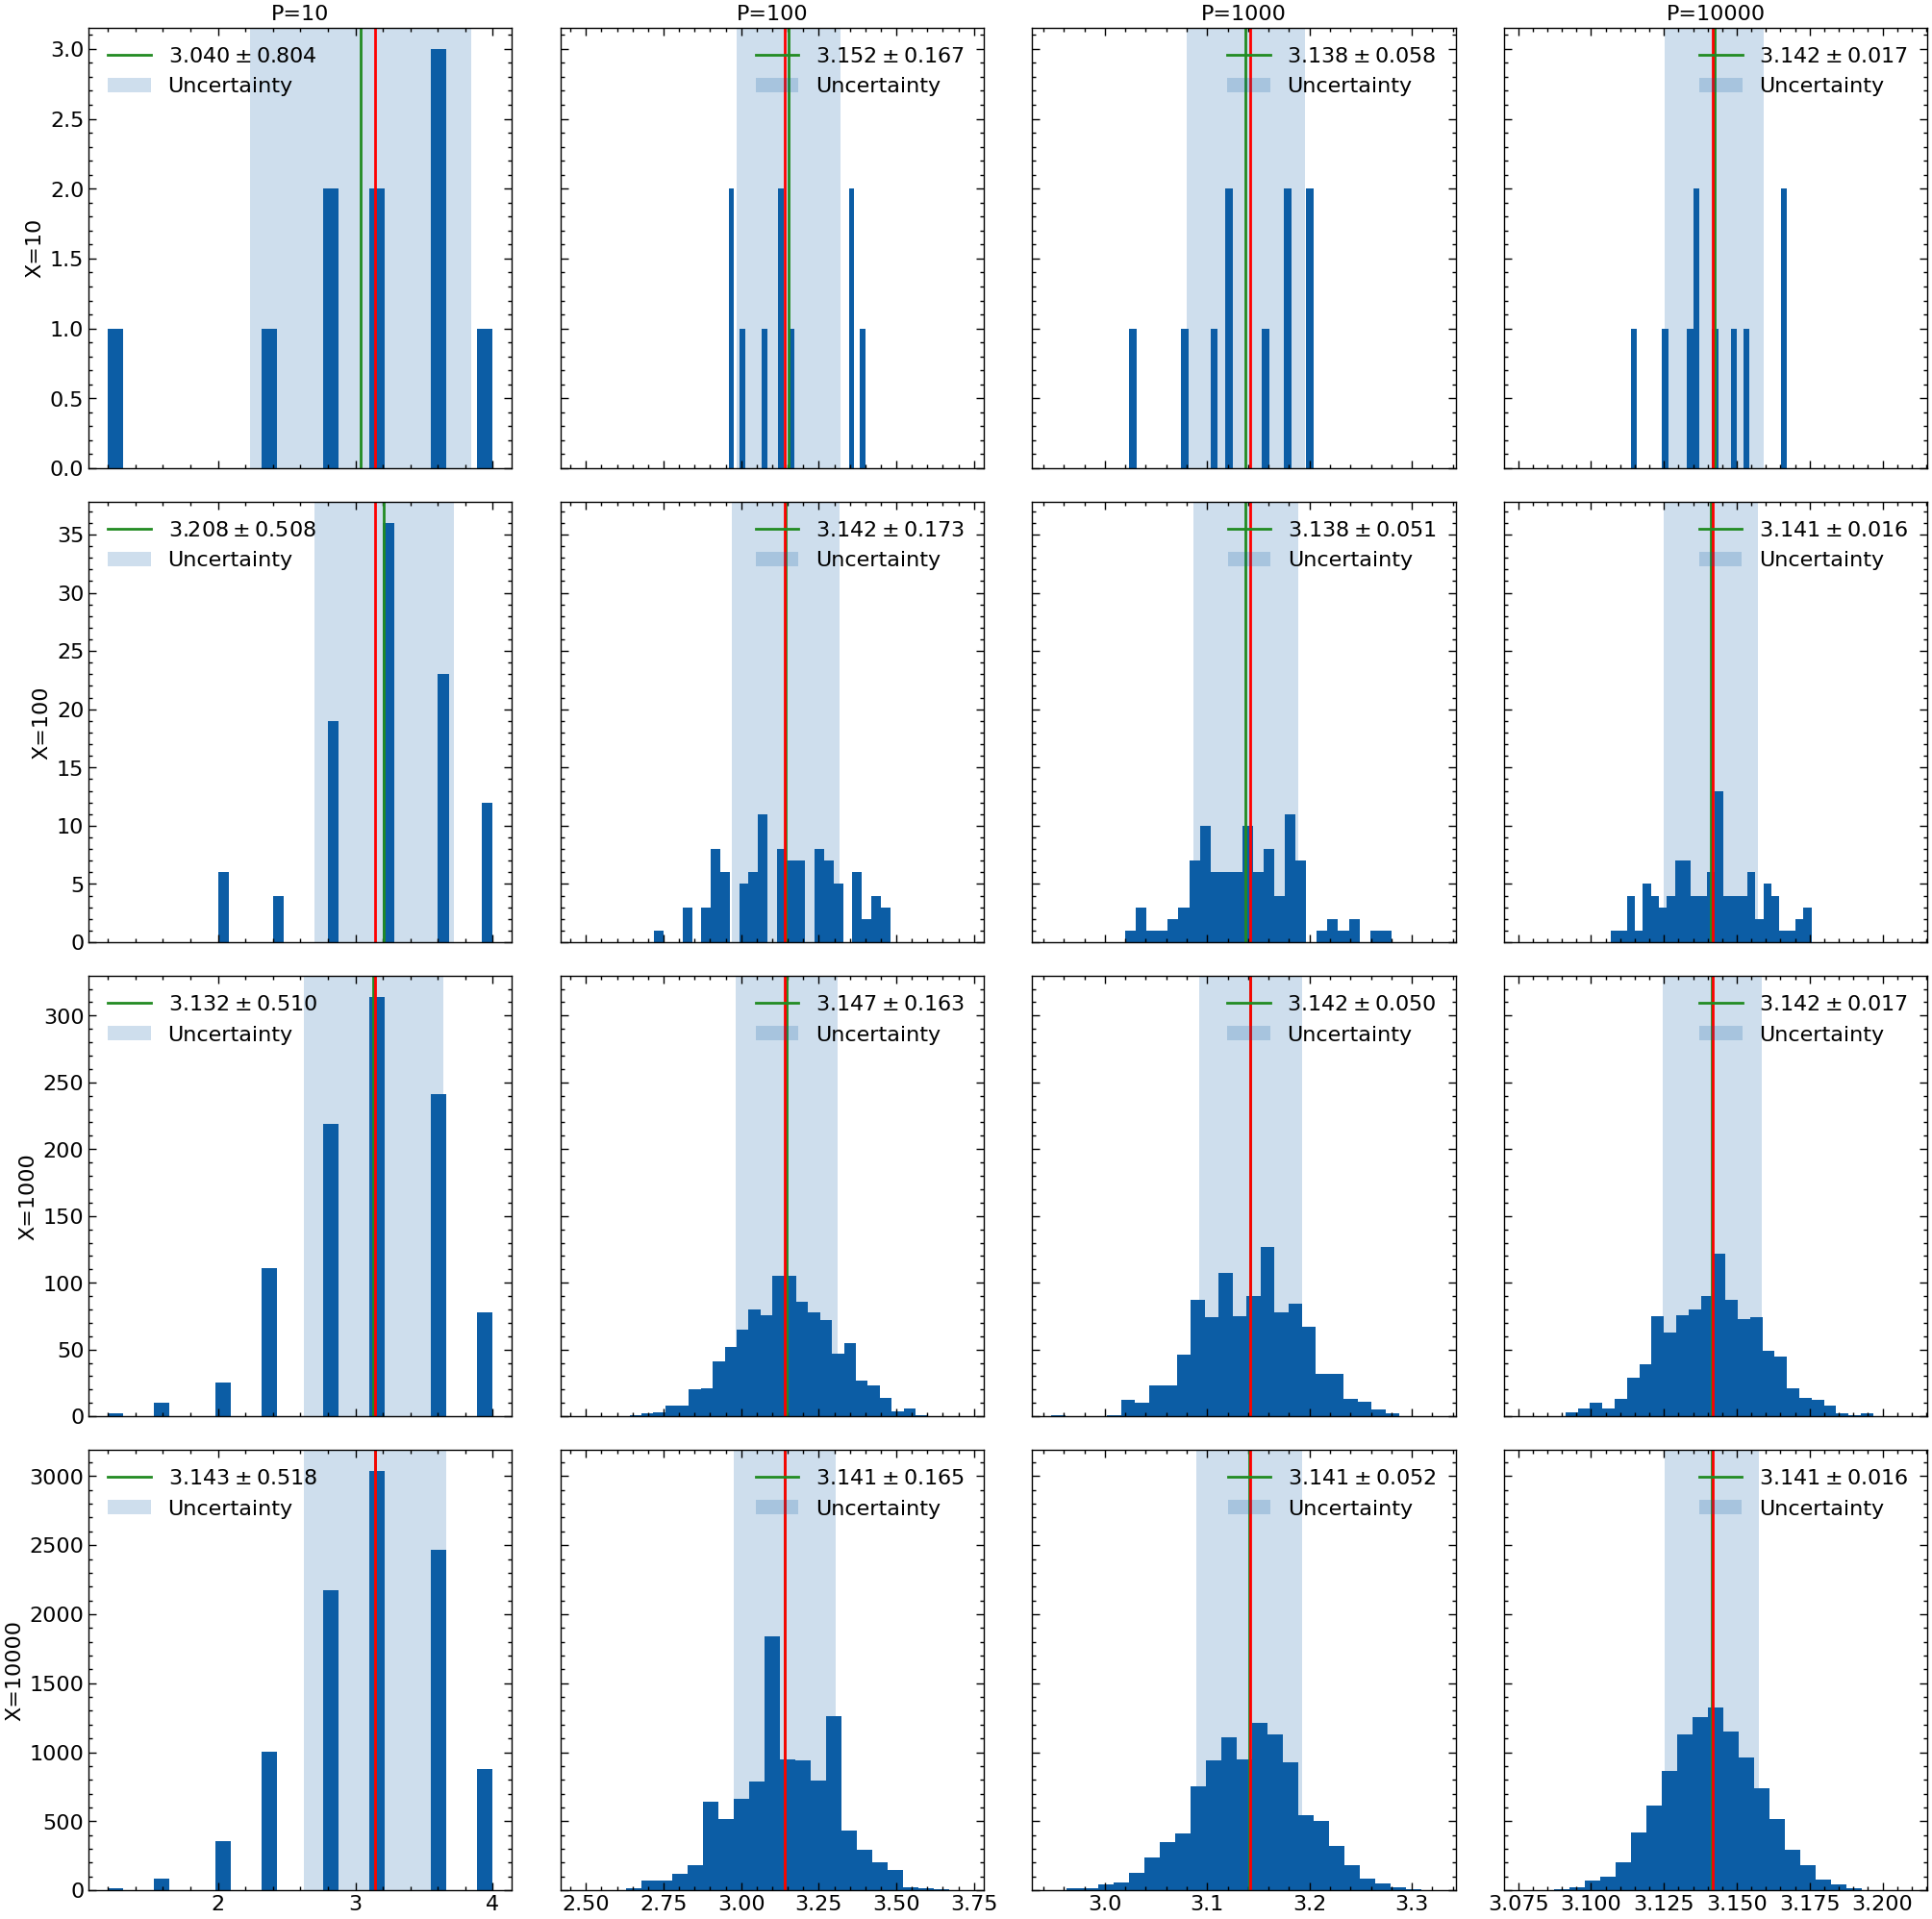

In [113]:
#estimate pi values & uncertainties for 16 pairs of P and X
#and save them for fixed P and fixed X

fixedp_uncertainty = dict()
fixedx_uncertainty = dict()

fig, ax = plt.subplots(4, 4, figsize=(20, 20), sharex='col', sharey='row')
fig.tight_layout()

for (row, num_experiments) in enumerate([10, 100, 1000, 10000]):
    for (col, num_samples) in enumerate([10, 100, 1000, 10000]):
        pi_means, pi_stds, radius = estimate_pi(num_samples, num_experiments)

        mean = pi_means.sum() / num_experiments
        uncertainty = np.sqrt(((pi_means - mean)**2).sum() / (num_experiments - 1))

        ax[row, col].hist(pi_means, bins=25)
        ax[row, col].axvline(x=mean, color='forestgreen', label=f'${mean:.3f} \\pm {uncertainty:.3f}$')
        ax[row, col].axvline(x=np.pi, color='red')
        ax[row, col].axvspan(xmin=mean - uncertainty, xmax=mean + uncertainty, alpha=0.2, label='Uncertainty')
        ax[row, col].legend()

        if col == 0:
            ax[row, col].set_ylabel(f'X={num_experiments}')
        if row == 0:
            ax[row, col].set_title(f'P={num_samples}')

        if num_samples in fixedp_uncertainty:
            fixedp_uncertainty[num_samples].append((num_experiments, uncertainty))
        else:
            fixedp_uncertainty[num_samples] = [(num_experiments, uncertainty)]

        if num_experiments in fixedx_uncertainty:
            fixedx_uncertainty[num_experiments].append((num_samples, uncertainty))
        else:
            fixedx_uncertainty[num_experiments] = [(num_samples, uncertainty)]

<font color='blue'>**Q: If you can only afford a fixed number of random pairs across all experiments XP, how should you spend them? Use the 16 results to explain what you mean.**</font>

As we can see above both $X$ and $P$ should both be $\geq 100$ and similarly sized. When looking at the matrix above, one can see that the diagonal from top left to bottom right seems to contain good values for $X$ and $P$.

<font color='blue'>**Q: For each $P$ plot the uncertainty as a function of $X$; plot it as a log-log plot (with 4 lines or sets of
points or however you like to draw it, one for each $P$; make sure the viewer can understand which is
which!)**</font>

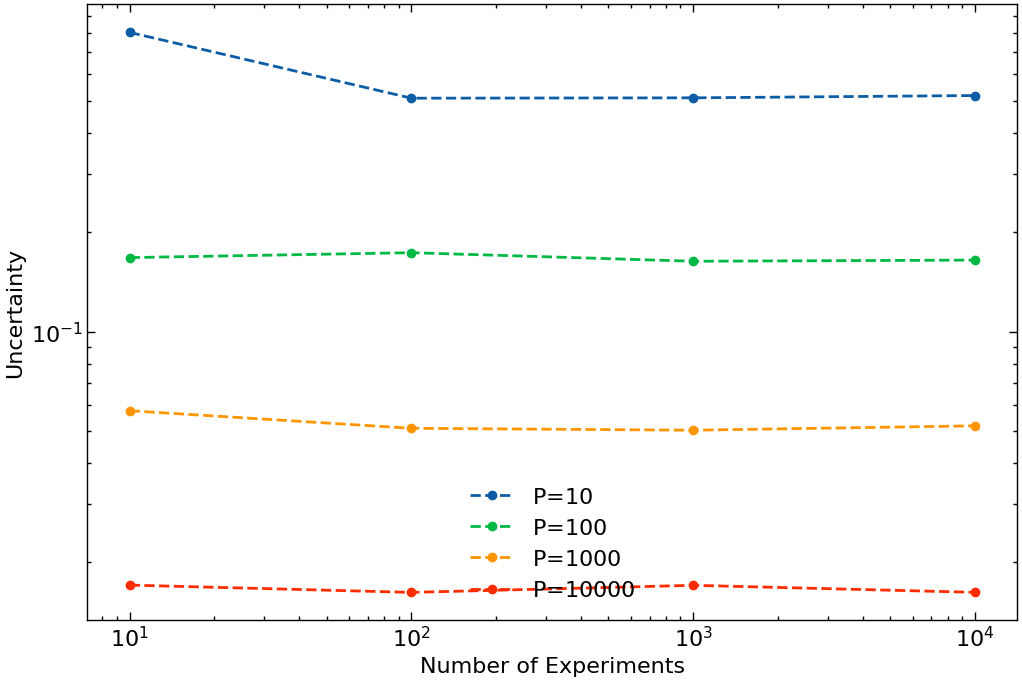

In [114]:
#plot uncertainties against X or P for fixed P/X

for p in fixedp_uncertainty:
    xarr = [item[0] for item in fixedp_uncertainty[p]]
    yarr = [item[1] for item in fixedp_uncertainty[p]]

    plt.loglog(xarr, yarr, 'o--', label=f'P=${p}$')

plt.xlabel('Number of Experiments')
plt.ylabel('Uncertainty')
plt.legend()

<font color='blue'>**Q: For each $X$ plot the uncertainty as a function of $P$; plot it as a log-log plot (with 4 lines or sets of
points or whatever, one for each $X$; make sure the viewer can understand which is which!)**</font>

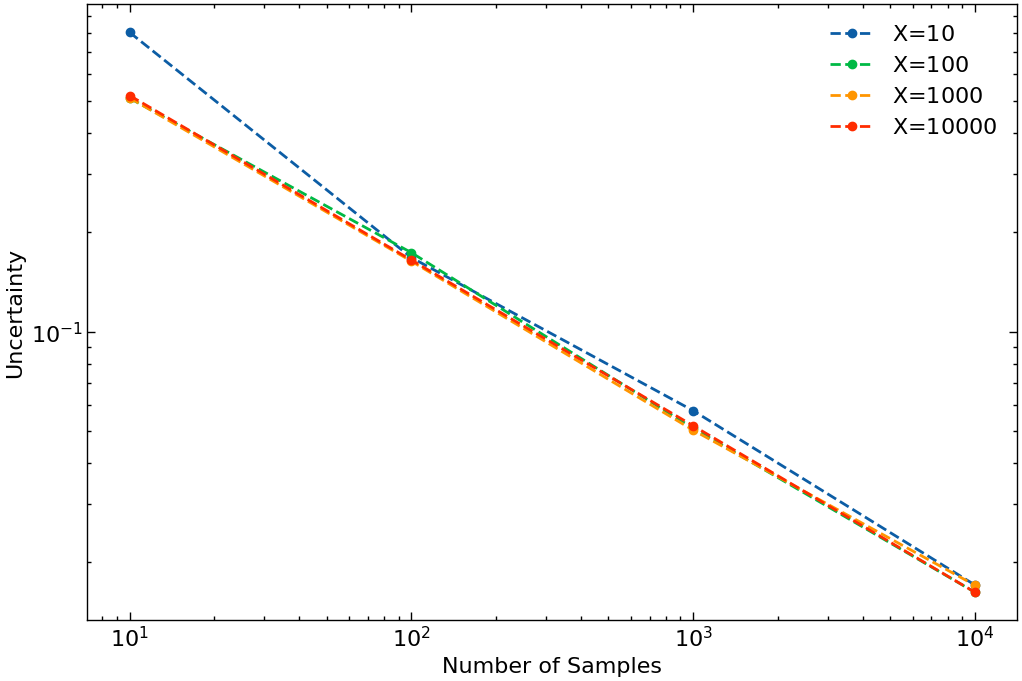

In [115]:
for x in fixedx_uncertainty:
    xarr = [item[0] for item in fixedx_uncertainty[x]]
    yarr = [item[1] for item in fixedx_uncertainty[x]]

    plt.loglog(xarr, yarr, 'o--', label=f'X=${x}$')

plt.xlabel('Number of Samples')
plt.ylabel('Uncertainty')
plt.legend()

<font color='blue'>**Q: Write a few sentences explaining what you see.**</font>
<br>

From the plots above one can see that the uncertainty shrinks with a growing number of samples while increasing the number of experiments does not change it. From this we gather that when we want to reduce the uncertainty of our numerical value, that we just have to increase the number of samples and not the number of experiments.